# PHY270 Assignment 12: Ordinary differential equations: Boundary-value problems
Student name: Begantsova Milana

---
##Abstract
In this programming assignment we will apply some numerical methods studied during the semester to implement Shooting and Finite difference methods. These are the most common methods used to solve Boundary-value differentiation problem. The task of this assignment is to find which method is the most optimal in terms of acuracy and compuational cost for the given differential equation (ODE). The results of this experiment are the graphs of approximated solutions, accuracy and exucution time of both methods. According to these outcomes, the most optimal method is Finite Difference methods.

---
##Introduction
In the previous two assignments we have studied differention tecniques that are used to solve initial value problems. Usually to apply those methods we need to know value of function at initial point and its derivative. But, I think that usually on practice it is easier to determine initial and final value of a function. In case when we don't have value of derivative we cannot apply Runge-Kutta of any order or Euler method. In this case we can apply Shooting and Finite Difference methods.

Shooting method and Finite difference methods use oposite paradigms. Shooting method at first solves root finding problem: we need to determine such value $s$ that $y'(0)=s$ and the difference between approximated and real values of $y(n)$ is minimum (close to 0). Once Shooting method determines the value of $y'(0)$, it then solves initial value problem for example with Euler method. At the Figure 1, you can see how approximated solutions are distribute around the real one with different $y'(0)$
<center>
<img src="https://www.cs.cmu.edu/~ph/859B/www/notes/ode/shoot.5.jpg" height="400">
<p>Figure 1 – Shooting method</p>
</center>

Finite difference method tries to solve boundary-value problem directly. It uses the assumptions that:
$$y'(x_i)=\frac{y(x_i)-y(x_{i-1})}{2\Delta x}$$
$$y''(x_i)=\frac{y(x_{i+1})-2y(x_{i})+y(x_{i-1})}{\Delta x^2}$$

And after substituting those formulas to original ODE and writing expresions for different $i$, we can notice the regularity and write it as system of linear equations. This system can be expressed as a tridiagonal matrix and easily solved by Thomas method, studied previously.

Both methods implementations will be discussed in detail in Methods section.

The first part of the experiment is dedicated to the finding of analytical solution to ODE. This solution will be used later on to estimate the accuracy of two methods. Also I will implement all subsidiary functions: root mean square error calculation, function to plot graphs.

In the second part I will implement Shooting method and find approximated solution with $\varepsilon<=0.001\%$ error. And then I will measure time execution. In the third part, I will implement Finite Difference method and will follow similar procedure. In the end I will graph all approximations in the same frame.

In conclusion, I will state which method is the most optimal to solve given ODE.

---
##Methods
In this programming assignment, we should solve next differential equation:
$$ \frac{d^2\!y}{dt^2}+4y=0$$
with boundary conditions $y(0)=1$ and $y\left(\frac{\pi}{4}\right)=5$.



###Shooting method
The shooting method is based on approximation $y'(0)=s$ and then solving initial value problem. I will identify value of $s$ using root finding approac: Secan method. While studying root finding methods, Secant method recommended itself as more or less universal, fast and accurate. There is also one more method – Newton-Raphson – that is similar to Secant method, but we cannot apply it since we don't know analytical formula for derivative. Next I will describe alghorithm of shooting method:
1. Choose range of possible values of $s\in[s_1, s_2]$
2. Choose number of subintervals – $n$
3. Approximate solution with Euler method with $s_1$ and $s_2$
4. Calculate derivative as:
$$\Delta g = \frac{Euler(s_2)-Euler(s_1)}{s_2-s_1}$$
5. We want to solve next root finding problem:
$$F = Euler(s_2)[-1] - y_n$$
$$F \approx 0$$
Find such $s_2$ that the difference between boundary $y_n$ and approximation is minimum.
6. Store $temp = s_2$ and then use the next update rule for $s_2$:
$$s_2 = s_2 - \frac{F}{\Delta g}$$
and update previous root $s_1 = temp$
7. Repeat 3-6 until change between two roots is small enough (converged) and store final root $s_2$.
8. Approximate solution with $Euler(s_2)$ and if it is needed increase value of $n$ to decrease rms-error.

This method may result in high computational cost. The approximation with Euler method is $O(n)$, but it will provide accurate results only with big $n$. Secant method will call for Euler method multiple times until it finds solution. So, computationally it will be costly to look for the right $s$. And since Secant method it is open-bracketing method, it may fail to converge if we choose wrong guesses for the root. We need some method that does not try to translate the problem to initial value.



###Finite difference method
As I have already mentioned in the introduction part, we need to substitute formulas for approximated second and first derivative to original ODE. We get next formula:
$$\frac{y_{i+1}-2y_i+y_{i-1}}{\Delta t^2}+4y_i=0$$
After some simplifications, it can be written as:
$$y_{i-1}+y_i(4\Delta t^2-2)+ y_{i+1}=0$$
We see that there is some constant that does not depend on $i$, so let:
$$\psi=4\Delta t^2-2$$
With Finite difference method we should choose $n$ points (with included boundary points). Suppose we have chosen 7 points (0-6), then 
\begin{equation*}
 \begin{cases}
i=1, \ y_0+ \psi y_1+y_2 = 0 \\
i=2, \ y_1 + \psi y_2 + y_3= 0 \\
i=3, \ y_2 + \psi y_3 + y_4= 0 \\
i=4, \ y_3 + \psi y_4 + y_5= 0 \\
i=5, \ y_4 + \psi y_5 + y_6= 0 \\
\end{cases}
\end{equation*}
When we choose n points with included boundary point, we have to solve system with $n-2$ unknowns. This system can be written as follows:
$$
A\times y = \begin{vmatrix}
\psi & 1 & 0 &0 &0\\
1 & \psi & 1 & 0 & 0\\
0 & 1 & \psi & 1 & 0\\
0 & 0 & 1 & \psi &1\\ 
0 & 0 & 0 & 1 & \psi\\
\end{vmatrix}
\times
\begin{vmatrix}
y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5
\end{vmatrix}
=
\begin{vmatrix}
-y_0 \\ 0 \\0 \\ 0\\ -y_6
\end{vmatrix}$$

This is a system of linear equations that can be efficiently solved with Thomas algorytm. So, the Finite difference method does not spend time on approximating value of $f'(0)$ and I suppose that it will require less datapoints (equations) then Euler method. The drawback of this method is that it requires preliminary analysis of ODE to construct correct matrix $A$.

###Data analysis
The problem definition requires us to chose what method is the most optimal in terms of precision and computational cost. To estimate the accuracy of approximation, I will:
1. Provide analytical solution to ODE
2. Approximate the solution using one of the methods 
3. Calculate root-mean-square percentage error according using function mean_squared_error from sklear.metrics libary.

To judge the compuational cost, I should identify such parameters that both methods will provide a solution with $\varepsilon<=0.001\%$. 

Once we identified needed parameters, we can use built-in magic function `%timeit`. We have already used this function in the previous assignments, but I would like to duplicate advantages of yjis function. It does not require including external libaries, it can identify itself how many cycle required to measure time execution and, we can store result of function as a `timeit object`. I will also plot approximated solutions in one frame using `matplotlib.plt`. But in this case graphical representation will be useful only in case one of the methods approximates abnormally. I expect all approximations to overlap each other and have the same behaviour/pattern.

---
##Experiment


In [ ]:
#import all neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

### Part 1 – Analytical solution and initial preparation
We can easily solve this differential equation:
$$ \frac{d^2\!y}{dt^2}+4y=0$$
by solving next characteristic equation:
$$r^2+4=0$$
$$r=\pm 2i$$
General solution:
$$y(t)=C_1\cos(2t)+C_2\sin(2t)$$
Initial conditions: $y(0) = 1$, $y(\frac{\pi}{4}) = 5$
\begin{equation*}
 \begin{cases}
y(0)=C_1=1 \\
y(\frac{\pi}{4})=C_2=5
\end{cases}
\end{equation*}
Final solution:
$$y(t)=\cos(2t)+5\sin(2t)$$

In [ ]:
def analytical_solution(t):
  return np.cos(2*t)+5*np.sin(2*t)

We will use result of `analytical_solution(t)` as theoretical solutions to ODE, which will be used to calculate percentage rms error:


This programming assignment also require us to plot our approximated solutions:

In [ ]:
# data - is a dictionary with next keys: x - values of t, y – solution of ODE at x 
# and label – legend

def graph_solution(data):
  fig, ax = plt.subplots(figsize=(10,8))
  #plot our graphs
  for x, y, label in zip(data['x'], data['y'], data['label']) :
    ax.plot(x, y, label = label)
  
  #graph settings
  plt.title("Solution of ODE", fontsize=18)
  ax.set_xlabel("t", fontsize=16)
  ax.set_ylabel("y(t)", fontsize=16)
  ax.legend()
  plt.grid()
  
  plt.show()

We have next boundary values:
$$y(0) = 1, \quad y\left(\frac{\pi}{4}\right)=5$$
And we should approximate our solution to $\varepsilon<=0.01\%$

In [ ]:
t_i, y_i = (0, 1)
t_f, y_f = (np.pi/4, 5)
eps = 0.01 # rms * 100%

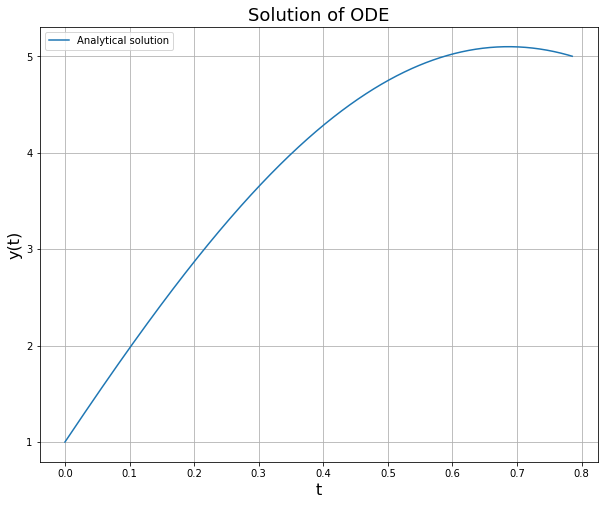

In [ ]:
t_theory = np.linspace(t_i, t_f, 1000)
y_theory = analytical_solution(t_theory)

data = {
    'x' : [t_theory], 'y': [y_theory], 'label':["Analytical solution"]
}
graph_solution(data)
# Figure 2 – Analytical solution of ODE

### Part 2 – Shooting method

Shooting method looks for such $s$ that we can solve boundary value problem as initial value problem.
$$ \frac{d^2\!y}{dt^2}= f(y, t, y')=-4y, \quad y(0)=1, y'(0)=s$$
We know how to solve initial value problems, for Example with Euler method. Suppose that:
$z=\frac{dy}{dt}$, then $z'=-4y$ \\
Let, 
$$g(y,t,z) = z$$ and $f(y,t, z)=-4y$
Now, we can use Euler method:
$$y_i=y_{i-1}+h\cdot g(y_{i-1},t_{i-1},z_{i-1})$$
$$z_i=z[i-1]+h \cdot f(y_{i-1},t_{i-1},z_{i-1})$$
Where,
 $$h=\frac{t_f-t_i}{n}$$
We can simplify expressions for $y_i$ and $z_i$ by substituting $f$ and $g$:
$$y_i=y_{i-1}+h\cdot z_{i-1}$$
$$z_i=z_{i-1}-4h\cdot y_{i-1}$$
Notice also that problem does not ask us to approximate values for $y'=z$, so there is no need to store values of $z$. The final pseudo-code:

```
y[0] = y_i
z = s
for i=1:n
  y[i] = y[i-1]+h*z
  z = z - 4*h*y[i-1]
endfor
```



In [ ]:
def euler_method(t_i, t_f, y_i, z, n):
  h = (t_f - t_i)/(n-1)
  y = [y_i]
  for i in range(1, n):
    y.append(y[-1] + h * z)
    z = z - 4 * h * y[-1]
  return y


Now lets randomly pick different values for $y'(0)=s\in\{0, 5, 15, 20\}$ and approximate with Euler method to see some regularity.

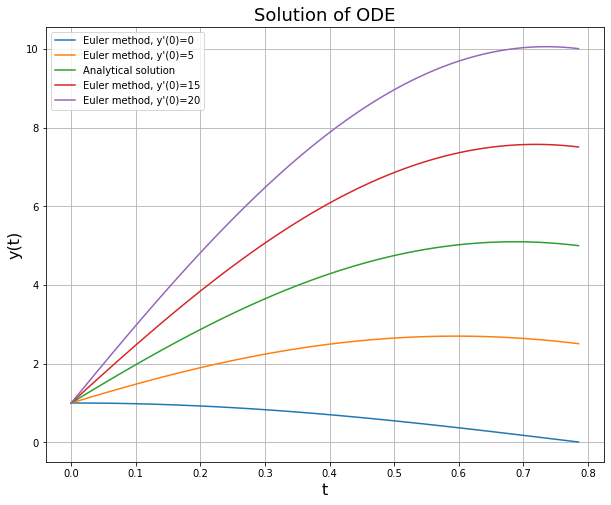

In [ ]:
t = np.linspace(t_i, t_f, 100)
data = {
    'x' : [t]*5, 
    'y': [euler_method(t_i, t_f, y_i, 0, 100), euler_method(t_i, t_f, y_i, 5, 100), analytical_solution(t), euler_method(t_i, t_f, y_i, 15, 100), euler_method(t_i, t_f, y_i, 20, 100),], 
    'label':["Euler method, y'(0)=0", "Euler method, y'(0)=5", f"Analytical solution", "Euler method, y'(0)=15", "Euler method, y'(0)=20"]
}
graph_solution(data)
# Figure 3 – Euler method with different values of y'(0)

If we look at the graph, we will notice that our value for $y'(0)$ is somewhere in the interval $s\in[5,15]$. Now I will use open-bracketing method called Secant method to find $s$. It requires two initial values for $s$: 

In [ ]:
s_1 = np.float128(5) 
s_2 = np.float128(15)

With Secant method we are trying to identify such $s$ that Euler method will approximate our solution and difference between approximated and real $y_f$ is minimum.

In [ ]:
# function to calculate change
def step(root_old, root):
  return abs(root-root_old)/root

def shooting_method(n, param, delt = 1e-10):
  
  root_old, root =  param['root_old'], param['root']
  approx_method = param['method']
  
  # find approximated solution with s = root_old
  y_old = approx_method(t_i, t_f, y_i, root_old, n)[-1]

  change = step(root_old, root)
  
  #check if value for s already converged
  while change > delt:
    # find approximated solution with s = root
    y_new = approx_method(t_i, t_f, y_i, root, n)
    # calculate derivative
    grad = (y_old - y_new[-1])/(root_old - root)
    
    # store previous root
    root_old = root
    
    # update rule of Secant method
    root = root - (y_new[-1]-y_f)/grad

    y_old = y_new[-1]
    change = step(root_old, root)
  
  return y_new

But we should ensure that $n$ that we have chosen will provide us solution with rms percentage error less than $0.01%$. We need to find such $n$:

In [ ]:
def find_n(func, step, **param):
  err = 1e17
  n = 0

  while err>eps:
    n+=step
    t = np.linspace(t_i, t_f, n)
    
    # calculate rms error
    measured =  func(n, param)
    theory = analytical_solution(t)
    err = mean_squared_error(theory, measured, squared=False)*100
    print(f"Rms-error: {err}, n: {n}")
    
  print(f"To get error = {err}%<={eps}%, we need {n} data points")
  return n, measured, err

In [ ]:
shooting_n_euler, shooting_solution_euler, shooting_err_euler = find_n(shooting_method, 3, root = s_1, root_old = s_2, method = euler_method)

Rms-error: 5.501251947788955, n: 3
Rms-error: 0.9170036482780554, n: 6
Rms-error: 0.36647887520877975, n: 9
Rms-error: 0.1962770184540953, n: 12
Rms-error: 0.12211501828045344, n: 15
Rms-error: 0.08325588275310367, n: 18
Rms-error: 0.0603816094260046, n: 21
Rms-error: 0.04578855763928074, n: 24
Rms-error: 0.03591216681754873, n: 27
Rms-error: 0.02891850709428314, n: 30
Rms-error: 0.02378564448932935, n: 33
Rms-error: 0.01990746295930744, n: 36
Rms-error: 0.01690597356776639, n: 39
Rms-error: 0.014535521421548674, n: 42
Rms-error: 0.01263084076425459, n: 45
Rms-error: 0.011077432580886446, n: 48
Rms-error: 0.009793937704218273, n: 51
To get error = 0.009793937704218273%<=0.01%, we need 51 data points


In [ ]:
shooting_t_euler = np.linspace(t_i, t_f, shooting_n_euler)
shoooting_time_euler = %timeit -o shooting_method(shooting_n_euler, {'root':s_1, 'root_old':s_2, 'method':euler_method})

10000 loops, best of 5: 166 µs per loop


The shooting method is costly because we try to approximate value of $s$ and call multiple times for euler function until we find correct root:

In [ ]:
%timeit euler_method(t_i, t_f, y_i, 10, shooting_n_euler,)

100000 loops, best of 5: 14.3 µs per loop


Maybe I can increase efficiency of the shooting methods if I will use midpoint method instead of Euler:

In [ ]:
def midpoint_method(t_i, t_f, y_i, z, n):
  h = (t_f - t_i)/(n-1)
  y = [y_i]
  for i in range(1, n):
    y.append(y[-1] + z*h*(1+h/2))
    z = z - 4 * h * (y[-1]+h/2)
  return y

In [ ]:
shooting_n_mid, shooting_solution_mid, shooting_err_mid = find_n(shooting_method, 600, root = s_1, root_old = s_2, method = midpoint_method)

Rms-error: 0.09851338448151943, n: 600
Rms-error: 0.04921028504828605, n: 1200
Rms-error: 0.03279656267992972, n: 1800
Rms-error: 0.024593564375502423, n: 2400
Rms-error: 0.01967300050666871, n: 3000
Rms-error: 0.016393138991846197, n: 3600
Rms-error: 0.014050632643555392, n: 4200
Rms-error: 0.012293890599291311, n: 4800
Rms-error: 0.010927617273655621, n: 5400
Rms-error: 0.0098346500137676, n: 6000
To get error = 0.0098346500137676%<=0.01%, we need 6000 data points


In [ ]:
shooting_t_mid = np.linspace(t_i, t_f, shooting_n_mid)
shoooting_time_mid = %timeit -o shooting_method(shooting_n_mid, {'root':s_1, 'root_old':s_2, 'method':midpoint_method})

10 loops, best of 5: 32.9 ms per loop


Though midpoint requires smaller $n$ – number of data points, its computational cost is a little bit highier:

In [ ]:
%timeit midpoint_method(t_i, t_f, y_i, 10, shooting_n_mid)

100 loops, best of 5: 2.52 ms per loop


But this difference is significant since shotting algoritm executes euler method/midpoint method multiple times. The euler method is more efficient in our case, but I will also put result for shooting method with midpoint method into summative table in the end.

### Part 3 – Finite difference method

In the methods section, I have already explained that we should a system of $n-2$ unknowns, where $n$ is number of data points. The matrix for case when $n=7$:
$$
A\times y = \begin{vmatrix}
\psi & 1 & 0 &0 &0\\
1 & \psi & 1 & 0 & 0\\
0 & 1 & \psi & 1 & 0\\
0 & 0 & 1 & \psi &1\\ 
0 & 0 & 0 & 1 & \psi\\
\end{vmatrix}
\times
\begin{vmatrix}
y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5
\end{vmatrix}
=
\begin{vmatrix}
-y_0 \\ 0 \\0 \\ 0\\ -y_6
\end{vmatrix}$$
where, $\psi=4\Delta t^2-2$ 
This is a thrediagonal matrix that can be solved using Thomas Algoritth. I will duplicate this algoritm from the Assignment #4:

In [ ]:
# a – lower diagonal, b – main diagonal, c – upper diagonal
# d – vector with answers

def TDMAsolver(a, b, c, d):
    n = len(d) # number of equations
    for i in range(1, n):
        m = a[i-1]/b[i-1]
        b[i] = b[i] - m*c[i-1] 
        d[i] = d[i] - m*d[i-1]

    x = d/b

    for i in range(n-2, -1, -1):
        x[i] -= c[i]*x[i+1]/b[i]

    return x

In [ ]:
def finite_difference(n, p=None): 
  dt = (t_f - t_i)/(n-1)
  # generate answers vector
  d = np.zeros(n-2)
  d[0] = -y_i
  d[-1] = -y_f

  # generate main diagonal
  psi = 4*dt**2-2
  b = np.ones(n-2)*psi

  # upper and lower diagonals
  a = np.ones(n-3)
  
  # solve system
  return [y_i]+list(TDMAsolver(a, b, a, d))+[y_f]

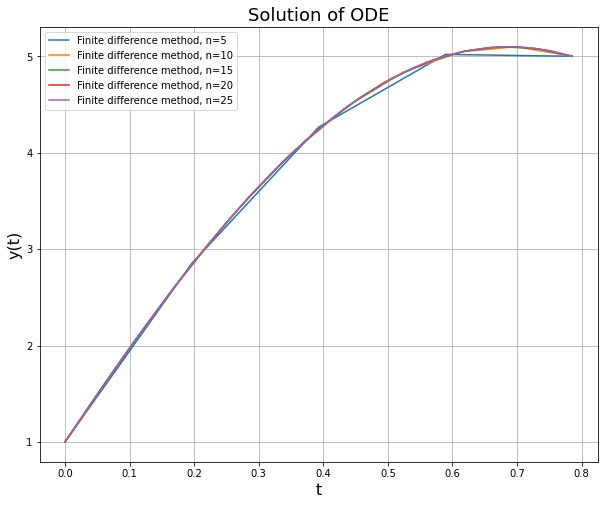

In [ ]:
n = [i*5 for i in range(1,6)]
data = {
    'x' : [np.linspace(t_i, t_f, i) for i in n], 
    'y': [finite_difference(i, {'dt': (t_f-t_i)/i}) for i in n], 
    'label':[f"Finite difference method, n={i}" for i in n]
}
graph_solution(data)
# Figure 4 – Finite difference method with different values of n

We again need to decide which $n$ will provide us with accurate solution. I will again use `find_n(function, step)`:

In [ ]:
finite_n, finite_solution, finite_err = find_n(finite_difference, 3)

Rms-error: 36.240452423228845, n: 3
Rms-error: 0.9170036482780799, n: 6
Rms-error: 0.3664788752088322, n: 9
Rms-error: 0.19627701845383694, n: 12
Rms-error: 0.12211501828141491, n: 15
Rms-error: 0.08325588275198859, n: 18
Rms-error: 0.060381609425063876, n: 21
Rms-error: 0.04578855763821411, n: 24
Rms-error: 0.03591216681471203, n: 27
Rms-error: 0.02891850709667009, n: 30
Rms-error: 0.023785644488964124, n: 33
Rms-error: 0.019907462962774555, n: 36
Rms-error: 0.016905973568903998, n: 39
Rms-error: 0.01453552142185591, n: 42
Rms-error: 0.012630840757611964, n: 45
Rms-error: 0.011077432570175147, n: 48
Rms-error: 0.009793937703393561, n: 51
To get error = 0.009793937703393561%<=0.01%, we need 51 data points


In [ ]:
finite_t = np.linspace(t_i, t_f, finite_n)
finite_time = %timeit -o finite_difference(finite_n)

10000 loops, best of 5: 145 µs per loop


In [ ]:
print(f"The Finite difference method is faster than Shooting Method {shoooting_time_euler.best/finite_time.best:.3f} times")

The Finite difference method is faster than Shooting Method 1.146 times


Now, we have approximated solutions of both Finite difference and Shooting method, and we can plot them in the frame:

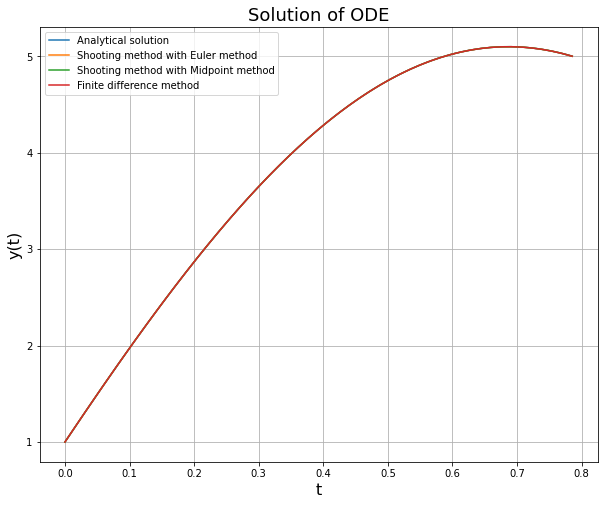

In [ ]:
data = {
    'x' : [t_theory, shooting_t_euler, shooting_t_mid, finite_t], 
    'y': [y_theory, shooting_solution_euler, shooting_solution_mid, finite_solution], 
    'label':["Analytical solution", "Shooting method with Euler method",
    "Shooting method with Midpoint method", "Finite difference method"]
}
graph_solution(data)
# Figure 5 – Approximated solutions & analytical solution

As I have already mentioned in the Methods section, the graphical method will not be useful in grading perfomance of methods (as we approximate them to the same accuracy). But this graph justified that we approximated solutions correctly, so they just overlapped analytical solution.

In [ ]:
# store the results of the experiment in dataframe
conclusion = pd.DataFrame({
    'Method':["Shooting method with Euler method", "Shooting method with Midpoint method",
              "Finite difference method"],
    'Rms-error, %':[shooting_err_euler, shooting_err_mid, finite_err], 
    'Time, s':[shoooting_time_euler.best, shoooting_time_mid.best, finite_time.best], 
    'n':[shooting_n_euler, shooting_n_mid, finite_n]
})

---
##Conclusion

In this programming assignment, we have implemented Shooting and Finite difference method. The purpose of this experiment was to compare the computational cost and precision of two methods. In the Table 1, you can see the summative results of the experiment:

In [ ]:
conclusion
# Table 1 – Results of the experiment

,Method,"Rms-error, %","Time, s",n
0,Shooting method with Euler method,0.009794,0.000166,51
1,Shooting method with Midpoint method,0.009835,0.032867,6000
2,Finite difference method,0.009794,0.000145,51


My hypothesis about shooting method that being costly was justified, but only partially. Computational cost of shooting method is strictly depedent on how do find right $y'(0)$ and differentiate the ODE. In this programming assignment I used Secant method for root finding (since it was the fastest method in assighnment about root finding). For differentiation, I used Euler and Midpoint methods. I haven't checked perfomance of other methods, since these two were the fastest one (Note: we had the same ODE with different initial conditions). Overall, I can say that Shooting method is very flexible and universal. Based on our ODE, we can decide whatever we want to find root with Bisection method, Newton-Raphson, Secant and etc. We also may choose between explicit or implicit differentiation methods. But it won't be too costly only in case when we choose right teqniques. 

If we consider results from the Table 1, the most effective and accurate method is Finite difference. It does not requiere use to approximate initial conditions and solves boundary-value problem directly. But, we need to conduct a preliminary analysis and each ODE can have unique matrix. This is one of the drawbacks. It will be also problematic to use it with highier order ODE. And I don't know how it will behave with non-homogeneous or stiff ODE.

But I will highlight it again, in case of our ODE the most efficient choice is Finite difference method. 

